# figure 15

In [1]:
import os
import cftime
import dask
import xarray as xr
import numpy as np
import nc_time_axis
import cartopy.mpl.ticker as cticker
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

from dask.distributed import Client
client = Client(n_workers=1, threads_per_worker=8, processes=False)
client



Client Scheduler: inproc://128.196.236.68/3704/1 Dashboard: http://localhost:34537/status,Cluster Workers: 1 Cores: 8 Memory: 67.54 GB


In [2]:
# mean field file
input_dir = '/storage1/home1/chiaweih/Research/proj3_omip_sl/data/GFDL/JRA/seasonal_field/' 
fileend = '_tro_1958_2017.nc'


endnum=len(fileend)
ds_var_mean = {}
varname = []
for file in os.listdir(input_dir):
    if file.endswith(fileend) and not file.startswith("._"):
        #print(file[:-endnum])
        var = file[:-endnum]
        ds_var_mean[var] = xr.open_dataset(input_dir+file)[var]
        varname.append(var)


In [3]:
varname

['rlntds',
 'thetao',
 'curltau',
 'sverdrup_trans',
 'tauuo',
 'hfsso',
 'tos',
 'tauvo',
 'so',
 'potential_rho',
 'net_heat_coupler',
 'hflso',
 'wo',
 'rsntds',
 'vo',
 'itd',
 'zos',
 'mld',
 'uo']

In [4]:
ds_var_season = {}

for nvar,var in enumerate(varname):
    ds_var_season[var] = ds_var_mean[var]-ds_var_mean[var].mean(dim='month')

In [5]:
import importlib
import create_ocean_mask
importlib.reload(create_ocean_mask)
from create_ocean_mask import levitus98

# # calculate zonal mean in the Pacific Basin
# from create_ocean_mask import levitus98

da_pacific = levitus98(ds_var_mean['zos'],
                       basin=['pac'],
                       reuse_weights=True, 
                       newvar=True, 
                       lon_name='x',
                       lat_name='y', 
                       new_regridder_name='')

Create weight file: basin_pacific_regrid.nc


# Plotting

# Latitude range 0-10N

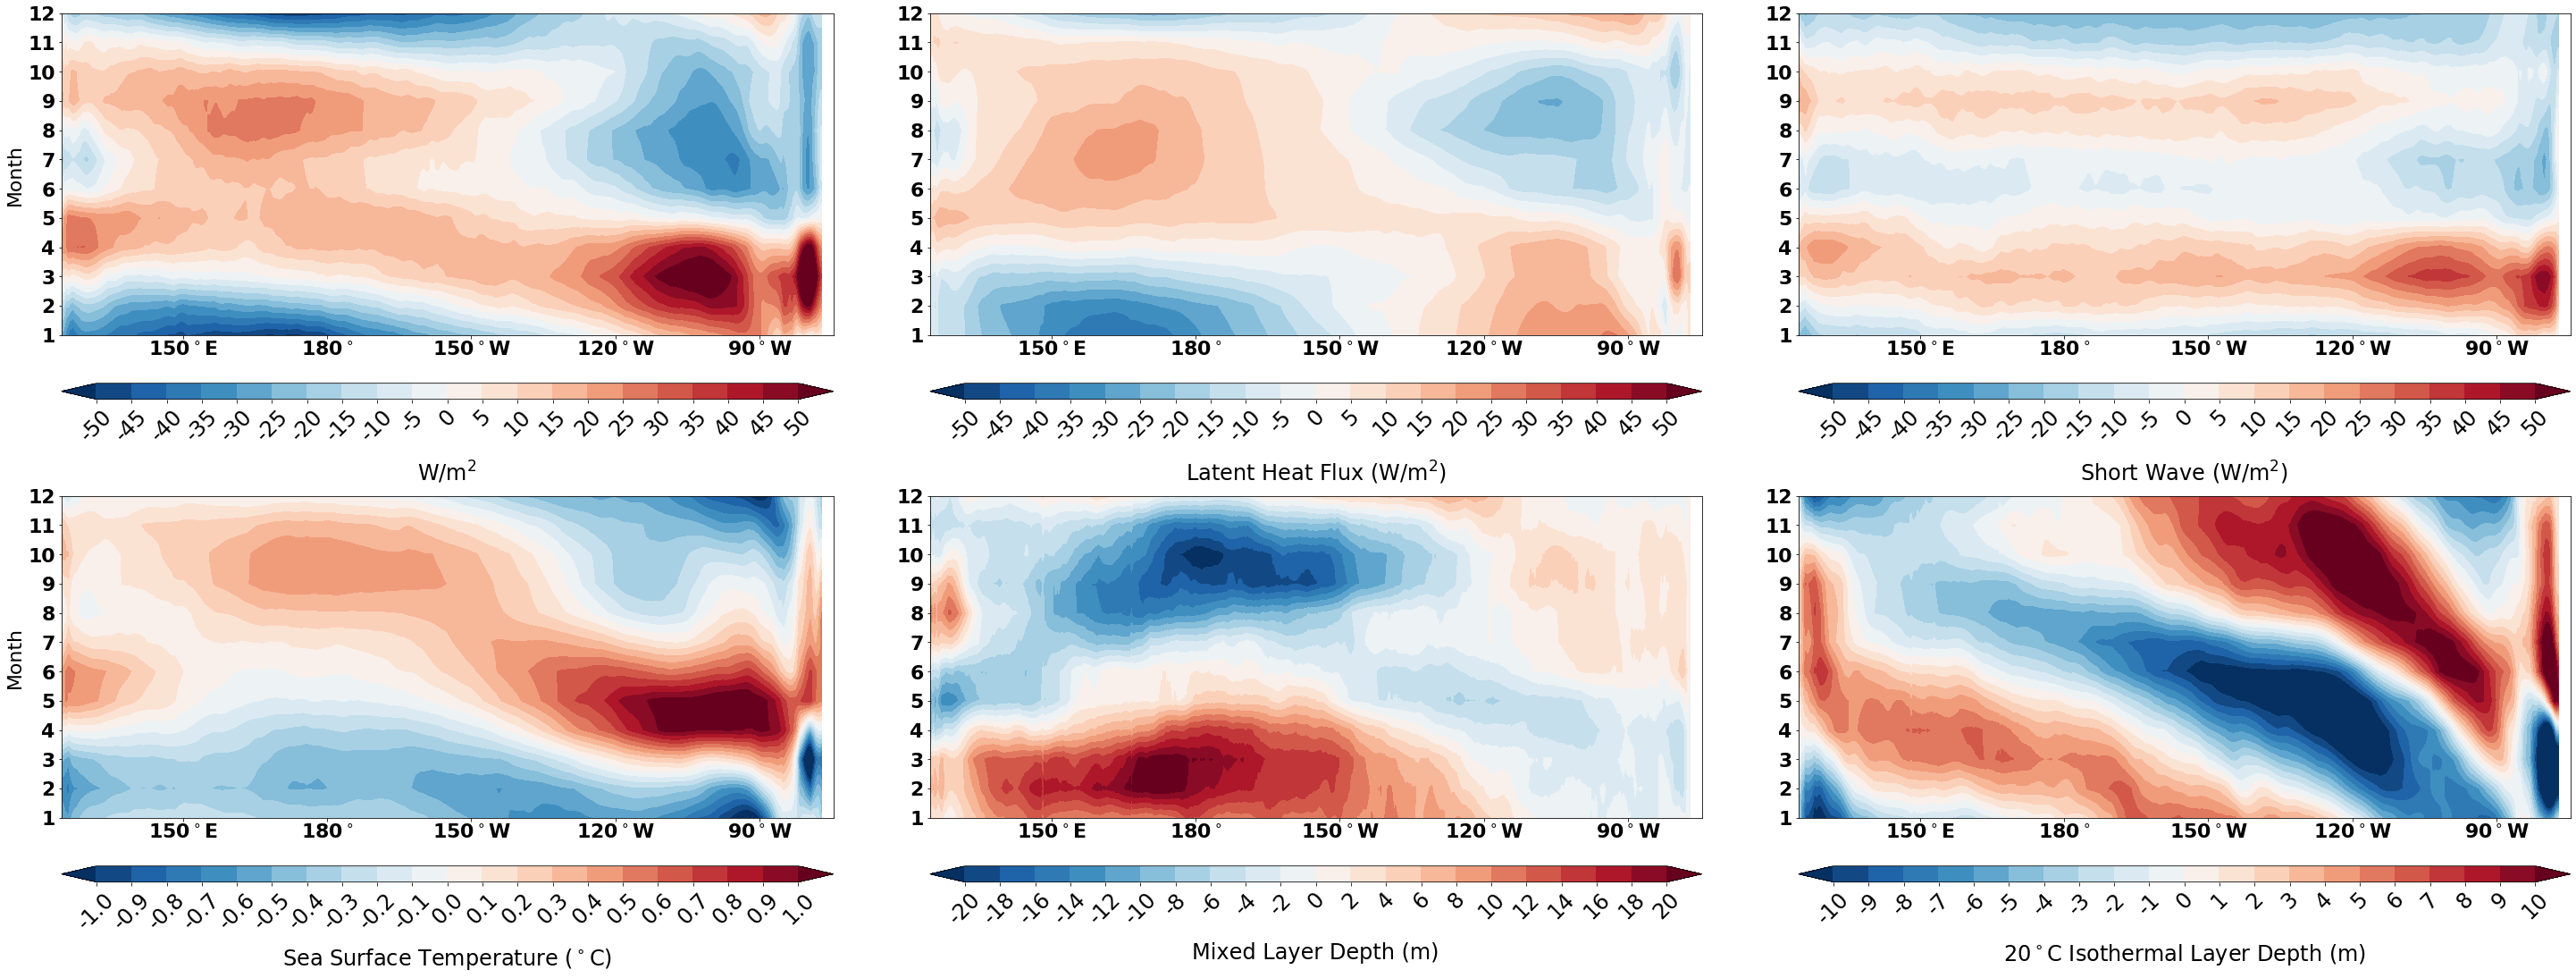

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5))
devy = 1.5
# setting regional boundary
lon_range = np.array([125,-75])   #-180~180
lat_range = np.array([2,10])

# correct the lon range
lon_range_mod = np.array(lon_range)
lonmin = ds_var_mean['zos'].lon.min()
ind1 = np.where(lon_range_mod>np.float(360.+lonmin))[0]
lon_range_mod[ind1] = lon_range_mod[ind1]-360.         # change Lon range to -300-60 (might be different for different


#### plotting
nmodel = 1
ax2 = fig.add_axes([0,0-nmodel*devy,1,1])


var2 = 'net_heat_coupler'
level = np.linspace(-50,50,21)
im = (ds_var_season[var2]*da_pacific)\
                      .where((ds_var_season[var2].lon<lon_range_mod.max()) &\
                             (ds_var_season[var2].lon>lon_range_mod.min()) &\
                             (ds_var_season[var2].lat<lat_range.max()) &\
                             (ds_var_season[var2].lat>lat_range.min()),drop=True).mean(dim='y')\
                      .plot.contourf(x='x',
                                     y='month',
                                     ax=ax2,
                                     levels=level,
                                     cmap='RdBu_r',
                                     extend='both')
cb=im.colorbar
cb.remove()
cbaxes=fig.add_axes([0,-0.2-nmodel*devy,0.8, 0.05])
cbar=fig.colorbar(im,cax=cbaxes,orientation='horizontal',extend='both')
cbar.set_ticks(level)
cbar.set_ticklabels(["%0.0f"%(n) for n in level])  
cbar.ax.tick_params(labelsize=24,rotation=45) 
cbar.set_label(label='W/m$^2$',size=24, labelpad=15)
ax2.set_title('Surface Heat Flux',size=30)


ax3 = fig.add_axes([0.9,0-nmodel*devy,1,1])
var2 = 'hflso'
level = np.linspace(-50,50,21)
im = (ds_var_season[var2]*da_pacific)\
                      .where((ds_var_season[var2].lon<lon_range_mod.max()) &\
                             (ds_var_season[var2].lon>lon_range_mod.min()) &\
                             (ds_var_season[var2].lat<lat_range.max()) &\
                             (ds_var_season[var2].lat>lat_range.min()),drop=True).mean(dim='y')\
                      .plot.contourf(x='x',
                                     y='month',
                                     ax=ax3,
                                     levels=level,
                                     cmap='RdBu_r',
                                     extend='both')

cb=im.colorbar
cb.remove()
cbaxes=fig.add_axes([0.9,-0.2-nmodel*devy,0.8, 0.05])
cbar=fig.colorbar(im,cax=cbaxes,orientation='horizontal',extend='both')
cbar.set_ticks(level)
cbar.set_ticklabels(["%0.0f"%(n) for n in level])  
cbar.ax.tick_params(labelsize=24,rotation=45) 
cbar.set_label(label='Latent Heat Flux (W/m$^2$)',size=24, labelpad=15)


ax4 = fig.add_axes([1.8,0-nmodel*devy,1,1])
var2 = 'rsntds'
level = np.linspace(-50,50,21)
im = (ds_var_season[var2]*da_pacific)\
                      .where((ds_var_season[var2].lon<lon_range_mod.max()) &\
                             (ds_var_season[var2].lon>lon_range_mod.min()) &\
                             (ds_var_season[var2].lat<lat_range.max()) &\
                             (ds_var_season[var2].lat>lat_range.min()),drop=True).mean(dim='y')\
                      .plot.contourf(x='x',
                                     y='month',
                                     ax=ax4,
                                     levels=level,
                                     cmap='RdBu_r',
                                     extend='both')

cb=im.colorbar
cb.remove()
cbaxes=fig.add_axes([0.9*2,-0.2-nmodel*devy,0.8, 0.05])
cbar=fig.colorbar(im,cax=cbaxes,orientation='horizontal',extend='both')
cbar.set_ticks(level)
cbar.set_ticklabels(["%0.0f"%(n) for n in level])  
cbar.ax.tick_params(labelsize=24,rotation=45) 
cbar.set_label(label='Short Wave (W/m$^2$)',size=24, labelpad=15)

# correct the lon range
lon_label = np.array([150,180,-150,-120,-90])
lon_label_mod = lon_label.copy()
ind1 = np.where(lon_label>np.float(360.+lonmin))[0]
lon_label_mod[ind1] = lon_label[ind1]-360.        

ax2.set_xticks(lon_label_mod)
ax2.set_xticklabels(['150$^\circ$E','180$^\circ$','150$^\circ$W','120$^\circ$W','90$^\circ$W'],
                    color='black', weight='bold',size=22)
ax2.set_yticks(np.arange(1,13,1))
ax2.set_yticklabels(np.arange(1,13,1), color='black', weight='bold',size=22)
ax2.yaxis.tick_left()
# ax2.grid(linewidth=2, color='black', alpha=0.3, linestyle='--')
ax2.set_xlabel('',size=22)
ax2.set_ylabel('Month',size=22)
ax2.set_title('', color='black', weight='bold',size=22)

ax3.set_xticks(lon_label_mod)
ax3.set_xticklabels(['150$^\circ$E','180$^\circ$','150$^\circ$W','120$^\circ$W','90$^\circ$W'],
                    color='black', weight='bold',size=22)
ax3.set_yticks(np.arange(1,13,1))
ax3.set_yticklabels(np.arange(1,13,1), color='black', weight='bold',size=22)
ax3.yaxis.tick_left()
# ax2.grid(linewidth=2, color='black', alpha=0.3, linestyle='--')
ax3.set_xlabel('',size=22)
ax3.set_ylabel('',size=22)
ax3.set_title('', color='black', weight='bold',size=22)

ax4.set_xticks(lon_label_mod)
ax4.set_xticklabels(['150$^\circ$E','180$^\circ$','150$^\circ$W','120$^\circ$W','90$^\circ$W'],
                    color='black', weight='bold',size=22)
ax4.set_yticks(np.arange(1,13,1))
ax4.set_yticklabels(np.arange(1,13,1), color='black', weight='bold',size=22)
ax4.yaxis.tick_left()
# ax2.grid(linewidth=2, color='black', alpha=0.3, linestyle='--')
ax4.set_xlabel('',size=22)
ax4.set_ylabel('',size=22)
ax4.set_title('', color='black', weight='bold',size=22)


######################################################
nmodel = 2
ax2 = fig.add_axes([0,0-nmodel*devy,1,1])


var2 = 'tos'
level = np.linspace(-1,1,21)
im = (ds_var_season[var2]*da_pacific)\
                      .where((ds_var_season[var2].lon<lon_range_mod.max()) &\
                             (ds_var_season[var2].lon>lon_range_mod.min()) &\
                             (ds_var_season[var2].lat<lat_range.max()) &\
                             (ds_var_season[var2].lat>lat_range.min()),drop=True).mean(dim='y')\
                      .plot.contourf(x='x',
                                     y='month',
                                     ax=ax2,
                                     levels=level,
                                     cmap='RdBu_r',
                                     extend='both')
cb=im.colorbar
cb.remove()
cbaxes=fig.add_axes([0,-0.2-nmodel*devy,0.8, 0.05])
cbar=fig.colorbar(im,cax=cbaxes,orientation='horizontal',extend='both')
cbar.set_ticks(level)
cbar.set_ticklabels(["%0.1f"%(n) for n in level])  
cbar.ax.tick_params(labelsize=24,rotation=45) 
cbar.set_label(label='Sea Surface Temperature ($^\circ$C)',size=24, labelpad=15)


ax3 = fig.add_axes([0.9,0-nmodel*devy,1,1])
var2 = 'mld'
level = np.linspace(-20,20,21)
im = (ds_var_season[var2]*da_pacific)\
                      .where((ds_var_season[var2].lon<lon_range_mod.max()) &\
                             (ds_var_season[var2].lon>lon_range_mod.min()) &\
                             (ds_var_season[var2].lat<lat_range.max()) &\
                             (ds_var_season[var2].lat>lat_range.min()),drop=True).mean(dim='y')\
                      .plot.contourf(x='x',
                                     y='month',
                                     ax=ax3,
                                     levels=level,
                                     cmap='RdBu_r',
                                     extend='both')

cb=im.colorbar
cb.remove()
cbaxes=fig.add_axes([0.9,-0.2-nmodel*devy,0.8, 0.05])
cbar=fig.colorbar(im,cax=cbaxes,orientation='horizontal',extend='both')
cbar.set_ticks(level)
cbar.set_ticklabels(["%0.0f"%(n) for n in level])  
cbar.ax.tick_params(labelsize=24,rotation=45) 
cbar.set_label(label='Mixed Layer Depth (m)',size=24, labelpad=15)


ax4 = fig.add_axes([1.8,0-nmodel*devy,1,1])
var2 = 'itd'
level = np.linspace(-10,10,21)
im = (ds_var_season[var2]*da_pacific)\
                      .where((ds_var_season[var2].lon<lon_range_mod.max()) &\
                             (ds_var_season[var2].lon>lon_range_mod.min()) &\
                             (ds_var_season[var2].lat<lat_range.max()) &\
                             (ds_var_season[var2].lat>lat_range.min()),drop=True).mean(dim='y')\
                      .plot.contourf(x='x',
                                     y='month',
                                     ax=ax4,
                                     levels=level,
                                     cmap='RdBu_r',
                                     extend='both')

cb=im.colorbar
cb.remove()
cbaxes=fig.add_axes([0.9*2,-0.2-nmodel*devy,0.8, 0.05])
cbar=fig.colorbar(im,cax=cbaxes,orientation='horizontal',extend='both')
cbar.set_ticks(level)
cbar.set_ticklabels(["%0.0f"%(n) for n in level])  
cbar.ax.tick_params(labelsize=24,rotation=45) 
cbar.set_label(label='20$^\circ$C Isothermal Layer Depth (m)',size=24, labelpad=15)

# correct the lon range
lon_label = np.array([150,180,-150,-120,-90])
lon_label_mod = lon_label.copy()
ind1 = np.where(lon_label>np.float(360.+lonmin))[0]
lon_label_mod[ind1] = lon_label[ind1]-360.        

ax2.set_xticks(lon_label_mod)
ax2.set_xticklabels(['150$^\circ$E','180$^\circ$','150$^\circ$W','120$^\circ$W','90$^\circ$W'],
                    color='black', weight='bold',size=22)
ax2.set_yticks(np.arange(1,13,1))
ax2.set_yticklabels(np.arange(1,13,1), color='black', weight='bold',size=22)
ax2.yaxis.tick_left()
# ax2.grid(linewidth=2, color='black', alpha=0.3, linestyle='--')
ax2.set_xlabel('',size=22)
ax2.set_ylabel('Month',size=22)
ax2.set_title('', color='black', weight='bold',size=22)

ax3.set_xticks(lon_label_mod)
ax3.set_xticklabels(['150$^\circ$E','180$^\circ$','150$^\circ$W','120$^\circ$W','90$^\circ$W'],
                    color='black', weight='bold',size=22)
ax3.set_yticks(np.arange(1,13,1))
ax3.set_yticklabels(np.arange(1,13,1), color='black', weight='bold',size=22)
ax3.yaxis.tick_left()
# ax2.grid(linewidth=2, color='black', alpha=0.3, linestyle='--')
ax3.set_xlabel('',size=22)
ax3.set_ylabel('',size=22)
ax3.set_title('', color='black', weight='bold',size=22)

ax4.set_xticks(lon_label_mod)
ax4.set_xticklabels(['150$^\circ$E','180$^\circ$','150$^\circ$W','120$^\circ$W','90$^\circ$W'],
                    color='black', weight='bold',size=22)
ax4.set_yticks(np.arange(1,13,1))
ax4.set_yticklabels(np.arange(1,13,1), color='black', weight='bold',size=22)
ax4.yaxis.tick_left()
# ax2.grid(linewidth=2, color='black', alpha=0.3, linestyle='--')
ax4.set_xlabel('',size=22)
ax4.set_ylabel('',size=22)
ax4.set_title('', color='black', weight='bold',size=22)

fig.savefig('../figure/figure15.pdf', dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', papertype=None, format=None,
                transparent=False, bbox_inches="tight", pad_inches=None,
                frameon=None)

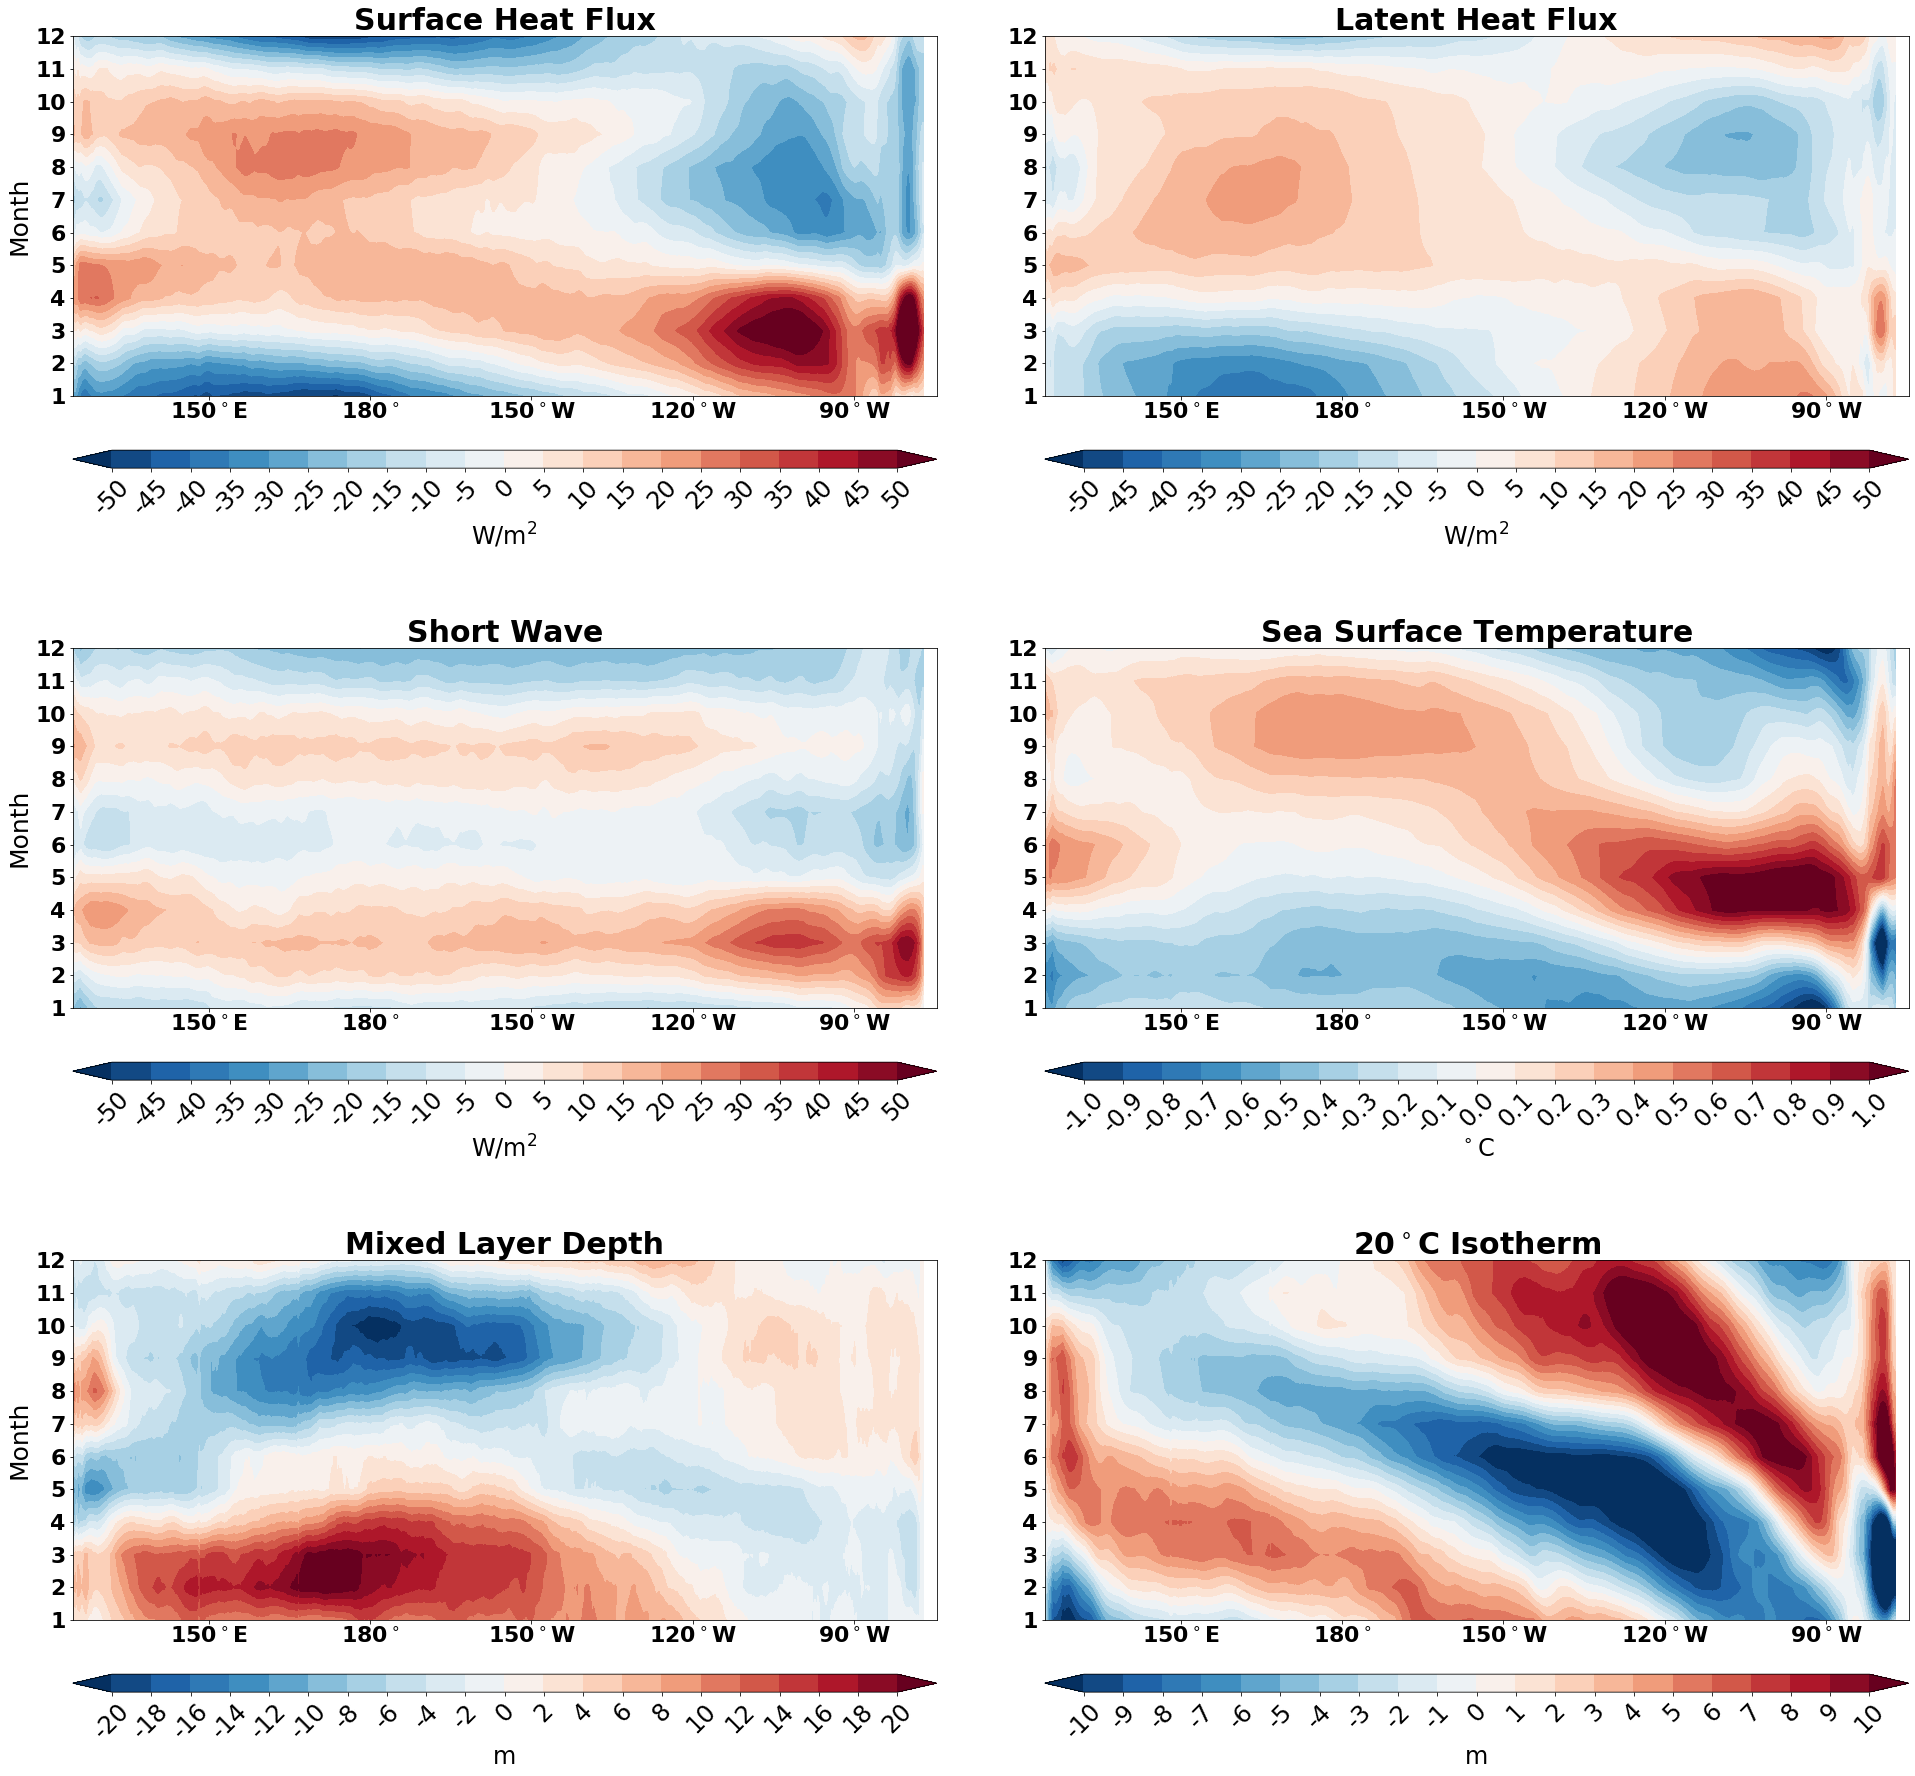

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5))
devy = 1.7
# setting regional boundary
lon_range = np.array([125,-75])   #-180~180
lat_range = np.array([2,10])

# correct the lon range
lon_range_mod = np.array(lon_range)
lonmin = ds_var_mean['zos'].lon.min()
ind1 = np.where(lon_range_mod>np.float(360.+lonmin))[0]
lon_range_mod[ind1] = lon_range_mod[ind1]-360.         # change Lon range to -300-60 (might be different for different


#### plotting
nmodel = 0
ax2 = fig.add_axes([0,0-nmodel*devy,1,1])


var2 = 'net_heat_coupler'
level = np.linspace(-50,50,21)
im = (ds_var_season[var2]*da_pacific)\
                      .where((ds_var_season[var2].lon<lon_range_mod.max()) &\
                             (ds_var_season[var2].lon>lon_range_mod.min()) &\
                             (ds_var_season[var2].lat<lat_range.max()) &\
                             (ds_var_season[var2].lat>lat_range.min()),drop=True).mean(dim='y')\
                      .plot.contourf(x='x',
                                     y='month',
                                     ax=ax2,
                                     levels=level,
                                     cmap='RdBu_r',
                                     extend='both')
cb=im.colorbar
cb.remove()
cbaxes=fig.add_axes([0,-0.2-nmodel*devy,0.8, 0.05])
cbar=fig.colorbar(im,cax=cbaxes,orientation='horizontal',extend='both')
cbar.set_ticks(level)
cbar.set_ticklabels(["%0.0f"%(n) for n in level])  
cbar.ax.tick_params(labelsize=24,rotation=45) 
cbar.set_label(label='W/m$^2$',size=24, labelpad=1)



ax3 = fig.add_axes([0.9,0-nmodel*devy,1,1])
var2 = 'hflso'
level = np.linspace(-50,50,21)
im = (ds_var_season[var2]*da_pacific)\
                      .where((ds_var_season[var2].lon<lon_range_mod.max()) &\
                             (ds_var_season[var2].lon>lon_range_mod.min()) &\
                             (ds_var_season[var2].lat<lat_range.max()) &\
                             (ds_var_season[var2].lat>lat_range.min()),drop=True).mean(dim='y')\
                      .plot.contourf(x='x',
                                     y='month',
                                     ax=ax3,
                                     levels=level,
                                     cmap='RdBu_r',
                                     extend='both')

cb=im.colorbar
cb.remove()
cbaxes=fig.add_axes([0.9,-0.2-nmodel*devy,0.8, 0.05])
cbar=fig.colorbar(im,cax=cbaxes,orientation='horizontal',extend='both')
cbar.set_ticks(level)
cbar.set_ticklabels(["%0.0f"%(n) for n in level])  
cbar.ax.tick_params(labelsize=24,rotation=45) 
cbar.set_label(label='W/m$^2$',size=24, labelpad=1)


# correct the lon range
lon_label = np.array([150,180,-150,-120,-90])
lon_label_mod = lon_label.copy()
ind1 = np.where(lon_label>np.float(360.+lonmin))[0]
lon_label_mod[ind1] = lon_label[ind1]-360.        

ax2.set_xticks(lon_label_mod)
ax2.set_xticklabels(['150$^\circ$E','180$^\circ$','150$^\circ$W','120$^\circ$W','90$^\circ$W'],
                    color='black', weight='bold',size=22)
ax2.set_yticks(np.arange(1,13,1))
ax2.set_yticklabels(np.arange(1,13,1), color='black', weight='bold',size=22)
ax2.yaxis.tick_left()
# ax2.grid(linewidth=2, color='black', alpha=0.3, linestyle='--')
ax2.set_xlabel('',size=22)
ax2.set_ylabel('Month',size=25)
ax2.set_title('Surface Heat Flux', color='black', weight='bold',size=30)

ax3.set_xticks(lon_label_mod)
ax3.set_xticklabels(['150$^\circ$E','180$^\circ$','150$^\circ$W','120$^\circ$W','90$^\circ$W'],
                    color='black', weight='bold',size=22)
ax3.set_yticks(np.arange(1,13,1))
ax3.set_yticklabels(np.arange(1,13,1), color='black', weight='bold',size=22)
ax3.yaxis.tick_left()
# ax2.grid(linewidth=2, color='black', alpha=0.3, linestyle='--')
ax3.set_xlabel('',size=22)
ax3.set_ylabel('',size=22)
ax3.set_title('Latent Heat Flux', color='black', weight='bold',size=30)

####################################
nmodel = 1

ax4 = fig.add_axes([0,0-nmodel*devy,1,1])
var2 = 'rsntds'
level = np.linspace(-50,50,21)
im = (ds_var_season[var2]*da_pacific)\
                      .where((ds_var_season[var2].lon<lon_range_mod.max()) &\
                             (ds_var_season[var2].lon>lon_range_mod.min()) &\
                             (ds_var_season[var2].lat<lat_range.max()) &\
                             (ds_var_season[var2].lat>lat_range.min()),drop=True).mean(dim='y')\
                      .plot.contourf(x='x',
                                     y='month',
                                     ax=ax4,
                                     levels=level,
                                     cmap='RdBu_r',
                                     extend='both')

cb=im.colorbar
cb.remove()
cbaxes=fig.add_axes([0,-0.2-nmodel*devy,0.8, 0.05])
cbar=fig.colorbar(im,cax=cbaxes,orientation='horizontal',extend='both')
cbar.set_ticks(level)
cbar.set_ticklabels(["%0.0f"%(n) for n in level])  
cbar.ax.tick_params(labelsize=24,rotation=45) 
cbar.set_label(label='W/m$^2$',size=24, labelpad=1)



ax2 = fig.add_axes([0.9,0-nmodel*devy,1,1])
var2 = 'tos'
level = np.linspace(-1,1,21)
im = (ds_var_season[var2]*da_pacific)\
                      .where((ds_var_season[var2].lon<lon_range_mod.max()) &\
                             (ds_var_season[var2].lon>lon_range_mod.min()) &\
                             (ds_var_season[var2].lat<lat_range.max()) &\
                             (ds_var_season[var2].lat>lat_range.min()),drop=True).mean(dim='y')\
                      .plot.contourf(x='x',
                                     y='month',
                                     ax=ax2,
                                     levels=level,
                                     cmap='RdBu_r',
                                     extend='both')
cb=im.colorbar
cb.remove()
cbaxes=fig.add_axes([0.9,-0.2-nmodel*devy,0.8, 0.05])
cbar=fig.colorbar(im,cax=cbaxes,orientation='horizontal',extend='both')
cbar.set_ticks(level)
cbar.set_ticklabels(["%0.1f"%(n) for n in level])  
cbar.ax.tick_params(labelsize=24,rotation=45) 
cbar.set_label(label='$^\circ$C',size=24, labelpad=1)


ax4.set_xticks(lon_label_mod)
ax4.set_xticklabels(['150$^\circ$E','180$^\circ$','150$^\circ$W','120$^\circ$W','90$^\circ$W'],
                    color='black', weight='bold',size=22)
ax4.set_yticks(np.arange(1,13,1))
ax4.set_yticklabels(np.arange(1,13,1), color='black', weight='bold',size=22)
ax4.yaxis.tick_left()
# ax2.grid(linewidth=2, color='black', alpha=0.3, linestyle='--')
ax4.set_xlabel('',size=22)
ax4.set_ylabel('Month',size=25)
ax4.set_title('Short Wave', color='black', weight='bold',size=30)

ax2.set_xticks(lon_label_mod)
ax2.set_xticklabels(['150$^\circ$E','180$^\circ$','150$^\circ$W','120$^\circ$W','90$^\circ$W'],
                    color='black', weight='bold',size=22)
ax2.set_yticks(np.arange(1,13,1))
ax2.set_yticklabels(np.arange(1,13,1), color='black', weight='bold',size=22)
ax2.yaxis.tick_left()
# ax2.grid(linewidth=2, color='black', alpha=0.3, linestyle='--')
ax2.set_xlabel('',size=22)
ax2.set_ylabel('',size=22)
ax2.set_title('Sea Surface Temperature', color='black', weight='bold',size=30)


######################################################
nmodel = 2

ax3 = fig.add_axes([0,0-nmodel*devy,1,1])
var2 = 'mld'
level = np.linspace(-20,20,21)
im = (ds_var_season[var2]*da_pacific)\
                      .where((ds_var_season[var2].lon<lon_range_mod.max()) &\
                             (ds_var_season[var2].lon>lon_range_mod.min()) &\
                             (ds_var_season[var2].lat<lat_range.max()) &\
                             (ds_var_season[var2].lat>lat_range.min()),drop=True).mean(dim='y')\
                      .plot.contourf(x='x',
                                     y='month',
                                     ax=ax3,
                                     levels=level,
                                     cmap='RdBu_r',
                                     extend='both')

cb=im.colorbar
cb.remove()
cbaxes=fig.add_axes([0,-0.2-nmodel*devy,0.8, 0.05])
cbar=fig.colorbar(im,cax=cbaxes,orientation='horizontal',extend='both')
cbar.set_ticks(level)
cbar.set_ticklabels(["%0.0f"%(n) for n in level])  
cbar.ax.tick_params(labelsize=24,rotation=45) 
cbar.set_label(label='m',size=24, labelpad=1)


ax4 = fig.add_axes([0.9,0-nmodel*devy,1,1])
var2 = 'itd'
level = np.linspace(-10,10,21)
im = (ds_var_season[var2]*da_pacific)\
                      .where((ds_var_season[var2].lon<lon_range_mod.max()) &\
                             (ds_var_season[var2].lon>lon_range_mod.min()) &\
                             (ds_var_season[var2].lat<lat_range.max()) &\
                             (ds_var_season[var2].lat>lat_range.min()),drop=True).mean(dim='y')\
                      .plot.contourf(x='x',
                                     y='month',
                                     ax=ax4,
                                     levels=level,
                                     cmap='RdBu_r',
                                     extend='both')

cb=im.colorbar
cb.remove()
cbaxes=fig.add_axes([0.9,-0.2-nmodel*devy,0.8, 0.05])
cbar=fig.colorbar(im,cax=cbaxes,orientation='horizontal',extend='both')
cbar.set_ticks(level)
cbar.set_ticklabels(["%0.0f"%(n) for n in level])  
cbar.ax.tick_params(labelsize=24,rotation=45) 
cbar.set_label(label='m',size=24, labelpad=1)

ax3.set_xticks(lon_label_mod)
ax3.set_xticklabels(['150$^\circ$E','180$^\circ$','150$^\circ$W','120$^\circ$W','90$^\circ$W'],
                    color='black', weight='bold',size=22)
ax3.set_yticks(np.arange(1,13,1))
ax3.set_yticklabels(np.arange(1,13,1), color='black', weight='bold',size=22)
ax3.yaxis.tick_left()
# ax2.grid(linewidth=2, color='black', alpha=0.3, linestyle='--')
ax3.set_xlabel('',size=22)
ax3.set_ylabel('Month',size=25)
ax3.set_title('Mixed Layer Depth', color='black', weight='bold',size=30)

ax4.set_xticks(lon_label_mod)
ax4.set_xticklabels(['150$^\circ$E','180$^\circ$','150$^\circ$W','120$^\circ$W','90$^\circ$W'],
                    color='black', weight='bold',size=22)
ax4.set_yticks(np.arange(1,13,1))
ax4.set_yticklabels(np.arange(1,13,1), color='black', weight='bold',size=22)
ax4.yaxis.tick_left()
# ax2.grid(linewidth=2, color='black', alpha=0.3, linestyle='--')
ax4.set_xlabel('',size=22)
ax4.set_ylabel('',size=22)
ax4.set_title('20$^\circ$C Isotherm', color='black', weight='bold',size=30)

fig.savefig('../figure/figure15.pdf', dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', papertype=None, format=None,
                transparent=False, bbox_inches="tight", pad_inches=None,
                frameon=None)